<a href="https://colab.research.google.com/github/ApurbaKumarNath/python-oop/blob/main/Python%2BOOP%20(Notes%20and%20University%20Assignments)/All%20conceptual%20notes%20(Basic%20%2B%20OOP)/013_OOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **Pillars of OOP:**
*   Class & Objects
*   Inheritance
*   Polymorphism
*   Encapsulation
*   Abstraction


**Components of a class:**
*   Data (the attributes about it)
*   Behavior (the methods)

To know Class diagram- https://www.tutorialspoint.com/uml/uml_class_diagram.htm

Magic methods - https://www.tutorialsteacher.com/python/magic-methods-in-python#:~:text=Python%20%2D%20Magic%20or%20Dunder%20Methods,class%20on%20a%20certain%20action.

# Pass by reference/pass by object reference
Mutability, Immutability, id(), and mutability of an object whose class was created by the user.

In [ ]:
# id() prints the object's memory location
# Mutable objects: lists, dictionaries, and sets.
# Immutable objects: integers, floats, strings, and tuples.

''' Things to keep in mind: When modified,
For Mutable objects:
 The memory location of the object does not change. Only the values change.

For Immutable objects:
 The memory location changes. A new object is created with the updated values. The old object always remains unchanged. That can't be changed.
'''

l1 = [1, 2]
print(id(l1))
l1.append(5)
print(id(l1), '\n')  # So, memory locations are same.


t1 = (1, 2)
print(id(t1))
t1 += (3, 4)  # New object (1, 2, 3, 4) is assigned to the same variable name t1. Memory location changed.
print(id(t1))

140402447385472
140402447385472 

140402447161984
140402447421408


In [ ]:
# Interning
'''
Python, for the sake of memory optimization and efficiency, may choose to reuse memory locations for immutable objects with the same value.
This behavior is known as "interning."
'''
x = 5
y = int(x/5 + 4)
print(x, y)
print(hex(id(x)), id(x), id(y)) # Memory locations of x and y are the same because of interning.

t1 = (1, 2, 3); t2 = t1
print(id(t1), id(t2))   # Same here.

5 5
0x7f355dabc170 139867181531504 139867181531504
139866914097600 139866914097600


In [ ]:
# "Pass by reference"
'''
When you pass a variable to a function, you're not passing the actual value of the variable but rather a reference to the memory location where the variable is stored.
For mutable objects (e.g., lists), changes made within the function will affect the original object.
For immutable objects (e.g., integers, strings), changes within the function create new objects, and the original data remains unchanged.
'''

l1 = [1,2]
print(l1, '=', id(l1), '=', end = ' ')

def list_changer(L):
  print(id(L))  # memory location of l1 = memory location of L.

  L.append(5)   # changes are made in the memory location of l1, hence l1 will be updated.
  print(L, '=', id(L))

list_changer(l1)

print(l1, '=', id(l1))  # So, the change was made in the function. Now, l1 is updated.


def L(a, b = []):
  b.append(a)
  print(b)
L(1)
L(2) # See! b var updates like b was a global var.

[1, 2] = 137053527793472 = 137053527793472
[1, 2, 5] = 137053527793472
[1, 2, 5] = 137053527793472
[1]
[1, 2]


In [ ]:
# Appearance of immutability
'''when you use slicing like l1[:] on a mutable object such as a list,
   it creates a new list that is a shallow copy of the original list.
   This new list is a separate object in memory, which can give the appearance of immutability, but it's still a mutable object.
   This new list is a separate object with its own memory location.
'''
l1 = [1, 2]
print(id(l1), '!=', id(l1[:]))

def modify_list(lst):
    lst.append(3)

l2 = l1[:]
modify_list(l2)

print(l1)
print(l2)

modify_list(l1[:]) # Now, this l1[:] doesn't share the same memory location with l1 or l2.
print(l1[:])

# Conclusion: l1[:] works like a new variable with new memory location. It's mutable.

140402447248512 != 140402446124800
[1, 2]
[1, 2, 3]
[1, 2]


In [ ]:
tup = (1, 2, 3)
print(tup, '=', id(tup), '=', end = ' ')

def changer(t):

  print(id(t))
  t = t + (5, 6)   # It creates a new tuple obj. (1, 2, 3, 5, 6) with new memory location, and its reference variable is set to the local variable t
  print(t, '=', id(t), end = ' != ')

changer(tup)
print(tup)

tup += (5, 7)
print(tup, '=', id(tup))

(1, 2, 3) = 140402447169088 = 140402447169088
(1, 2, 3, 5, 6) = 140402449087392 != (1, 2, 3)
(1, 2, 3, 5, 7) = 140402449087392


In [ ]:
tup = (1, 2, 3)
print(tup, '=', id(tup), '=', end = ' ')

def tup_changer(tup):

  print(id(tup))
  tup += (5, 6)   # It creates a new tuple obj. (1, 2, 3, 5, 6) with new memory location, and its reference variable is set to the local variable tup
                  # Don't think that if I use the same name for the variable it'll change/modify the global variable.
  print(tup, '=', id(tup), end = ' != ')

tup_changer(tup)
print(tup)

tup += (5, 7)
print(tup, '=', id(tup))

(1, 2, 3) = 140402447147648 = 140402447147648
(1, 2, 3, 5, 6) = 140402446739280 != (1, 2, 3)
(1, 2, 3, 5, 7) = 140402446739280


In [ ]:
'''
One example:
In a class, x.tup = (1, 2), x.tup is the attribute, tup is the instance variable, and x is the instance.

Class objects can be Mutable/Immutable.
   And if instance variable of the class = immutable object,
   And if I make changes to the instance variable in a function, (e.g. x.tup += (1, 2))
   It creates a new immutable object as usual, and its reference variable is the attribute of the object.

   Earlier we saw for immutable objects, changes were made to the local variable of the function. Global variable remained the same.
   But things work differently here. Changes do create new immutable objects and memory locations,
                                      but the reference variable is the attribute itself.

   Think of it this way: For non-custom classes, changes are made directly to the object.
                          So, new memory location is set to the local variable instead of the global variable.
                          So, Local variable gets updated. Global variable doesn't get updated.

                          But, for custom classes, changes are made to the attributes of the classes.
                          So, new memory location is set to the attribute (not the local variable), and the attribute gets updated.'''

class Immutable:
  def __init__(self, tup):
    self.tup = tup

def immutable(tx):
  tx.tup += (4, 5)   # New object (1, 2, 4, 5) has a new memory location, and it's set to the attribute. So, attribute gets updated.
                     # You cannot think of tx.tup as a local variable.
  print(tx.tup, '=', id(tx.tup), '=', end = ' ')

t = Immutable((1, 2))
print(t.tup, '=', id(t.tup))
immutable(t)

print(t.tup, '=', id(t.tup))

(1, 2) = 136855304426752
(1, 2, 4, 5) = 136855729294368 = (1, 2, 4, 5) = 136855729294368


In [ ]:
# For mutable objects, things are just like before. Memory location doesn't change after any changes.
class Mutable:
  def __init__(self, lis):
    self.lis = lis

def mutable(li):
  li.lis += [4, 5]
  print(li.lis, '=', id(li.lis), '=', end = ' ')

l = Mutable([1, 2])
print(l.lis, '=', id(l.lis))
mutable(l)

print(l.lis, '=', id(l.lis))

[1, 2] = 136854761305024
[1, 2, 4, 5] = 136854761305024 = [1, 2, 4, 5] = 136854761305024


# Class, Objects, constructor, class & instance variables, static and class methods.

In [ ]:
Lis = list() # we have (object literal) in python. So, we don't need to make lists like this.
             # Python internally understands Lis = list() when you write Lis = [].
             # But for user defined classes, you have to write  in this manner: object = class()
# Built-In Class Attributes in Python
print(str, int, float, complex, dict, list, tuple, 'etc.') # All these are some classes and data types of python.
print(isinstance(20, int), isinstance(2.0, float)) # Return whether an object is an instance of a class or of a subclass thereof.

print(type(print())) # print() has been called inside type() function. So, it printed a blank space first. Nothing returns to print(), So, <class 'NoneType'>

print(type([1, 2].append(1))) # This prints the class of the method's value, not the list object. Nothing is returned in the append method. So, it's NoneType.

print(type(str)) # str is already a class. So, it prints <class 'type'>
print(type(int())) # Here it prints the class of int() object. int is the class, but int() = 0.
print(type(1+2j))

print('#########################################')
class MyClass:
  pass
print(type(MyClass))
print(MyClass)
print(MyClass()) # This is an object
print(type(MyClass()))

<class 'str'> <class 'int'> <class 'float'> <class 'complex'> <class 'dict'> <class 'list'> <class 'tuple'> etc.
True True

<class 'NoneType'>
<class 'NoneType'>
<class 'type'>
<class 'int'>
<class 'complex'>
#########################################
<class 'type'>
<class '__main__.MyClass'>
<class '__main__.MyClass'>


In [ ]:
# Static attributes and methods

class Student:
  print('The class is created') # This will be printed for class making (not for object making).
  att = 'This is an attribute' # It's a static attribute/Class variable. These are shared equally among the objects of the class.
  # These 2 lines are executed for the class making -- fixed only once. These won't execute every time we create objects.

  def method(): # Didn't use any parameters bcz I'll use the class to call this method. Works like static method.
    print('This is like a static method')
  def summ(a, b): # Didn't use self here bcz I'll use the class to call this method. Works like staticmethod or classmethod.
    sum = a + b
    print(sum)


print(Student.att)
Student.method()


Student.summ(1, 2)
''' When called like this (e.g --> class.method()), the class is not taken as the 1st parameter.
    But when an object will be used(e.g --> obj.method()), the object will be taken as the 1st parameter.
    Although, things will work differently if @staticmethod or @classmethod is used.'''

obj = Student()
print(obj.att); obj.att = 'Attribute change'
print(Student.att)

# Possible mistakes:

#obj.method() # TypeError: Student.method() takes 0 positional arguments but 1 was given
# the object of the class is the 1st positional argument of the method.

#obj.summ(1, 2) # TypeError: Student.summ() takes 2 positional arguments but 3 were given
#The object (obj) takes the parameter a. Then, 1 takes b. And 2 is left alone.

#obj.summ(1) # TypeError: unsupported operand type(s) for +: 'Student' and 'int'

The class is created
This is an attribute
This is like a static method
3
This is an attribute
This is an attribute


In [ ]:
# object/reference variable/instance are the same.

class Student:
  def __init__(): #constructor
    pass
print(Student)
#print(Student()) # TypeError: Student.__init__() takes 0 positional arguments but 1 was given


class Student:
  att = 'Class attribute'
  def __init__(self):
    self.att1 = 'An attribute' # Instance variable

#print(Student.att1) #AttributeError: type object 'Student' has no attribute 'att1'. att1 is not a static attribute.
obj = Student()
print(Student().att1 == obj.att1) # True
obj.new = 'New attribute of obj which was created outside the constructor.'
print(obj.new)
print('#########################################')

first_location = Student() #It is a reference variable bcz it holds the location of the object Student()
second_location = Student()
print(first_location, 'is not same as', second_location) # Two objects have two different locations. The locations are passed to self.
print(id(first_location), '!=', id(second_location))

print('#########################################')
# Writing code without __init__ is inefficient like this code:
class Robot:
  def details(self):
    print(f"My name is: {self.name}, and my color is {self.color}.")

r1, r2 = Robot(), Robot()

r1.name, r2.name = 'Red_robot', 'Blue_robot'
r1.color, r2.color = 'Red', 'Blue'

r1.details()
r2.details()

<class '__main__.Student'>
True
New attribute of obj which was created outside the constructor.
#########################################
<__main__.Student object at 0x7ff138f4faf0> is not same as <__main__.Student object at 0x7ff138f4e680>
140674019425008 != 140674019419776
#########################################
My name is: Red_robot, and my color is Red.
My name is: Blue_robot, and my color is Blue.


In [ ]:
from re import T
# Let's count the number of objects in a class
#1st way: using static attribute
class MyClass:
  counter = 0
  def __init__(self):
    MyClass.counter += 1
    self.serial = MyClass.counter

obj1 = MyClass()
obj2 = MyClass()
print(obj2.serial, MyClass.counter)

obj2.serial = 200; print(obj2.serial, MyClass.counter) # Manually changing the object's serial number.

#Static attributes don't change every time we make an object.
# So, for MyClass, counter becomes 0, and for every object, counter keeps incrementing because of (MyClass.counter += 1).

print('#########################################')
# A different example
class Cricket:
  player_run = 0 # default run before batting = 0
  team_run = 0
  def __init__(self, run):
    self.player_run += run
    Cricket.team_run += run
player1 = Cricket(10)
player2 = Cricket(4)
print(player2.player_run, Cricket.team_run)
print('#########################################')

#2nd way: using global variable
global_next_id = 1

class MyClass:
    def __init__(self):
        global global_next_id
        self.serial = global_next_id
        global_next_id += 1
obj1 = MyClass()
obj2 = MyClass()
print(obj2.serial)

2 2
200 2
#########################################
4 14
#########################################
2


In [ ]:
# A basic concept:

class VariableChange:
  def __init__(self, a, b):
    self.a = a
    self.b = b
    print(self.var_changer(1)) # calling a method in another method
  def var_changer(self, val):
    self.a += val
    return val

obj = VariableChange(10, 11)
print(obj.a + obj.var_changer(11) + obj.a) # (11 + 11 + 22)

# value of self.a was changed when var_changer was called.

print('#############################')

# Another basic concept:
class Separation:
  shared = 1
  def __init__(self):
    Separation.shared += 1

obj = Separation()
print(Separation.shared, obj.shared)

# When you do this:
Separation.shared += 1
print(Separation.shared, obj.shared) # Both gets updated

# But if you do this:
obj.shared += 1
print(Separation.shared, obj.shared) # only obj.shared changes

# Now, if you do this:
Separation.shared += 1
print(Separation.shared, obj.shared) # only Separation.shared changes

# So, if class and instance var share the same name, be careful when you change the instance var. They will get separated if you change.

1
44
#############################
2 2
3 3
3 4
4 4


In [ ]:
# Working with decorators
class Number:
  a = 10
  def __init__(self, val):
    self.a = val

  @classmethod
  def m1(cls, a):
    cls.a += a

  @staticmethod
  def m2(a):
    Number.a += a
    return Number.a

  @classmethod
  def using_classmethod(cls):
    print('After using @classmethod, you can now define class methods like this.')
  '''
  def out_of_classmethod(cls):
    print('')''' # As we haven't used @classmethod here, it's not a class method. Same goes for static methods.

obj = Number(1)
obj.m1(1) # It takes the class, not obj. This is the speciality of the decorator. So, here, obj.m1(1) = Number.m1(1)
print(obj.a)

print(Number.a)
Number.m1(1) # Class method takes the class as the 1st parameter.
print(Number.a)

obj.a = obj.m2(1) # obj.m2(1) = Number.m2(1) # Static method cannot take the class or the object as parameter.
print(Number.a, '=', obj.a)

Number.using_classmethod()
# Number.out_of_classmethod() # TypeError: Number.out_of_classmethod() missing 1 required positional argument: 'cls'

1
11
12
13 = 13
After using @classmethod, you can now define class methods like this.


In [ ]:
class Instance:
  def __init__(self, a):
    print(self)

  @classmethod
  def instancecreator(cls): # could make this without the decorator
    return cls(1)

  def instancecreate():
    return Instance(1)

  @staticmethod
  def instancemaker():
    return Instance(2)

# obj = Instance() #==> we know obj = self.
# But object creation doesn't need a reference variable like obj. e.g.,
Instance(1)


obj = Instance.instancecreator() # Instance created
obj2 = Instance.instancecreate()
obj3 = Instance.instancemaker()

# Method overloading, Operator overloading, & Relationship



**Polymorphism**: 3 types:
1. Method Overriding
2. Method Overloading
3. Operator Overloading

In [ ]:
'''Method overloading:
    In java, if 2 methods are created using the same name, depending on the parameters given, code automatically recognizes which method to use.
    But, in python, only the latter method is used if 2 methods have the same name.'''

class LazyCalculator:
  user = None
  def __init__(self):
    print("This won't work!")
  def __init__(self): # This is constructor overloading

    user = int(input('If you wish to add numbers, enter 1. \
                    \nOr subtract, enter 2.\
                    \nOr close, enter any other number.\n'))

    if user == 1:
      self.add()
    elif user == 2:
      self.subtract()
    else:
      print('Closed! Good luck.')


  def add(self):
    print("This won't be used.")
  def add(self):  # This is method overloading
    a = int(input('Enter the 1st value: '))
    b = int(input('Enter the 2nd value: '))
    print(a + b)
    print('Returning to the main console...')
    print('#########################################')
    self.__init__()
  def subtract(self):
    a = int(input('Enter the 1st value: '))
    b = int(input('Enter the 2nd value: '))
    print(a - b)
    print('Returning to the main console...')
    print('#########################################')
    self.__init__()

obj1 = LazyCalculator()

If you wish to add numbers, enter 1.                     
Or subtract, enter 2.                    
Or close, enter any other number.
2
Enter the 1st value: 1
Enter the 2nd value: 3
-2
Returning to the main console...
#########################################
If you wish to add numbers, enter 1.                     
Or subtract, enter 2.                    
Or close, enter any other number.
3
Closed! Good luck.


In [ ]:
# Here, you can't create 2 methods (named "area" only) for getting the area of circle and rectangle, but that is still easily solvable.
class Geometry:
  def area(self, radiusOrLength, width = 0):
    if width == 0:
      return 3.14 * radiusOrLength**2 # circle
    else:
      return radiusOrLength * width # rectangle

obj = Geometry()
print(obj.area(4), 'is the area of the circle.')
print(obj.area(4, 4), 'is the area of the rectangle.')

print('#########################################')


#Using dispatch: now we have methods with the same name.
from multipledispatch import dispatch
class SumClass:

  @dispatch(int,int)
  def sum(self,a,b):
    print(a+b,'int,int')

  @dispatch(int,int,int)
  def sum(self,a,b,c):
    print(a+b+c)

  @dispatch(str,str)
  def sum(self,a,b):
    print(int(a)+int(b))

  @dispatch(str,float)
  def sum(self,a,b):
    print(int(a)+b)

  @dispatch(int,str)
  def sum(self,a,b):
    print(a+int(b))

s1 = SumClass()
s1.sum(2, 4, 5)

50.24 is the area of the circle.
16 is the area of the rectangle.
#########################################
11


In [ ]:
# Operator overloading: using magic method/s to change the behaviors of the operators.
# Showing the way to set the look of the object. e.g. li = list(); print(li) ==> []

# Let's create a class of fraction:
class Fraction:
  def __init__(self, numerator, denominator):
    self.numerator = numerator
    self.denominator = denominator
  def __str__(self):
    return '{}/{}'.format(self.numerator, self.denominator)
    # or, return f'{self.numerator}/{self.denominator}'


# Now, the numbers will be in fractional format instead of decimal
# Just so that you know, you cannot add 2 sets/dictionaries using (+). But it's possible with list and tuple.
# set1 = {1, 2}
# set2 = {2, 3}
# print(set1 + set2) # TypeError: unsupported operand type(s) for +: 'set' and 'set'

# Similarly,
# x = Fraction()
# y = Fraction()
# print(x + y) # TypeError: unsupported operand type(s) for +: 'Fraction' and 'Fraction'


# Now setting the behaviour of the Fraction class for using (+, -, *, /):

# To add the numbers, use __add__
  def __add__(num1, num2):
    temp_numerator = num1.numerator * num2.denominator + num1.denominator * num2.numerator
    temp_denominator = num1.denominator * num2.denominator
    return '{}/{}'.format(temp_numerator, temp_denominator)

# To subtract:
  def __sub__(num1, num2):
    temp_numerator = num1.numerator * num2.denominator - num1.denominator * num2.numerator
    temp_denominator = num1.denominator * num2.denominator
    return '{}/{}'.format(temp_numerator, temp_denominator)

# To multiply:
  def __mul__(num1, num2):
    temp_numerator = num1.numerator * num2.numerator
    temp_denominator = num1.denominator * num2.denominator
    return '{}/{}'.format(temp_numerator, temp_denominator)

# To divide:
  def __truediv__(num1, num2):
    temp_numerator = num1.numerator * num2.denominator
    temp_denominator = num1.denominator * num2.numerator
    return '{}/{}'.format(temp_numerator, temp_denominator)


x = Fraction(1, 2)
y = Fraction(1, 3)
print(x)
print(y)
print(x + y)
print(x - y)
print(x * y)
print(x / y)

1/2
1/3
5/6
1/6
1/6
3/2


**Relationship**: 2 types:
1. Aggregation(Means: has a relation)
2. Inheritance(Means: Is a relation)

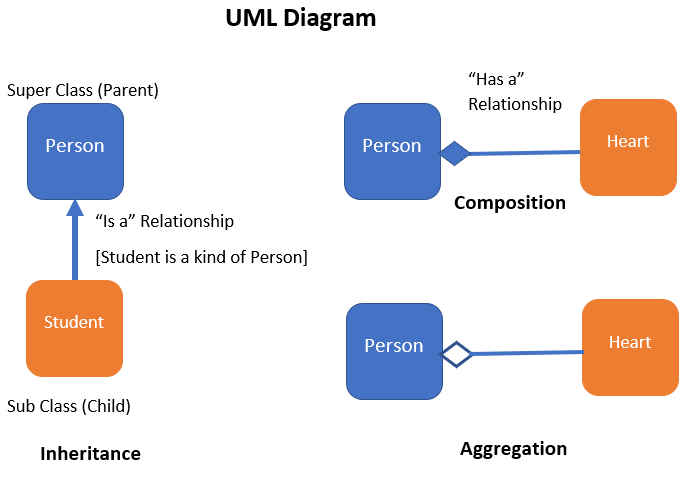

In [ ]:
'''By Composition(Has-A Relation) - Aggregation
Composition is a concept that models a has a relationship.
It enables creating complex types by combining objects of other types.
This means that a class Composite can contain an object of another class Component.
By using the class names or by creating an object we can access the member of one class inside another class.'''

class A:
  count = 0
  def __init__(self):
    A.count += 1
    if self.__str__() == 'An object of A class.': # Remember: self is not just a string.==> so, self != 'An object of A class.'
      self.color = 'Blue'
    else:
      self.color = 'Red'

  def __str__(self):
    if A.count == 1:
      return 'An object of A class.'
    else:
      return 'Another object of A class.'

  def changer(self):
    self.color = 'Green Red Blue is not in sequence. Red Green Blue is in sequence. Ask why? Cz it is RGB(Red Green Blue). Hehe.'

class B:
  def __init__(self, obj):
    self.objHolding = obj
    self.color = 'Red'
    self.compare(obj)

  def compare(self, obj):
    if self.color == self.objHolding.color:
      self.objHolding.changer() # same as obj.changer()
      print(self.objHolding.color == obj.color, self.objHolding == obj)
      print(type(self.objHolding) == type(obj), type(self) == type(obj))
    else:
      print("Whooops. Colors didn't match.")

obj1 = A()
print(obj1.__str__(), '=', obj1, obj1.__str__() == obj1)
obj2 = A()
obj3 = B(obj1)
obj4 = B(obj2)

An object of A class. = An object of A class. False
Whooops. Colors didn't match.
True True
True False


# Encapsulation & Inheritance



```
Encapsulation:
In OOP, encapsulation means wrapping attributes and methods that work on the attributes together in a single unit(class) and hiding it from other units.

The purpose of encapsulation is restricting the access to attributes and methods of a class to prevent the accidental modification of data.

To achieve encapsulation most OOP languages have access modifiers(Public, Private, Protected and Default).

 In Python we do not have any access modifier but it can be achieved by following some conventions and name mangling.


Access Modifiers
Keywords to maintain access to attributes and methods in a class.

There are 4 access modifiers in most OOP languages (Java, C++ etc.). They are:-

Public – Class members with public access modifiers are accessible from anywhere outside the class.
It can be from other classes of the same package or different package as well.

Private – Class members with private access modifiers are accessible only within the class.
The members cannot be accessed from outside of the class.

Protected – Class members with protected access modifiers are accessible only within the class and its subclasses.

Default – If we do not mention any access modifier( Public, Private and Protected) before a class member, it gets default access modifier.
Class members with default access modifiers are accessible from anywhere(any class) inside the same package.
```



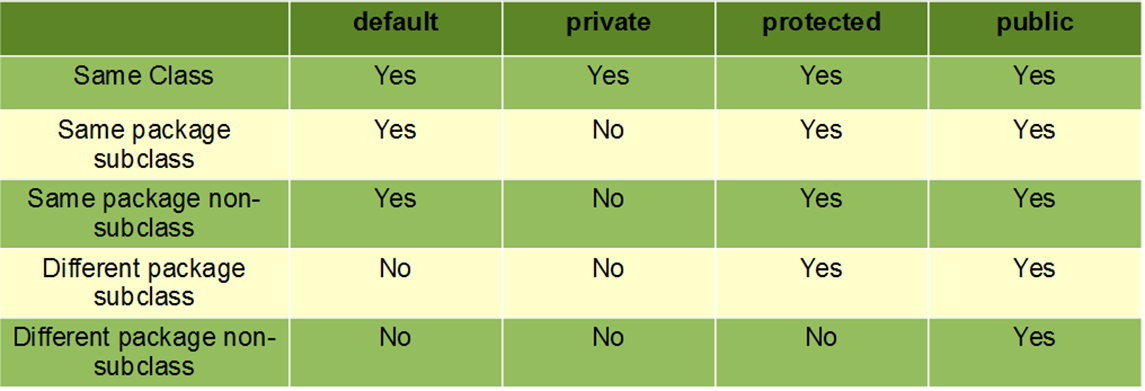

In [ ]:
class Student:
  __overall_students = 0 #Private class member
  __idCard = 'Available' # ^ (same)
  _homeDistance = 'Nearby' #Protected class member

  def __init__(self, name, id, email):
    self.name = name #public member
    self._email = email #Protected member
    self.__id = id #Private member
    Student.__overall_students += 1


  def getID(self):
    return self.__id

  def changeID(self, id):
    self.__id = id
    return self.__id

  def overall_students_count():
    return Student.__overall_students

  @classmethod
  def classPrinter(cls):
    print(cls)

  def __privateMethod(self):
    print('This should not be used by the student tutors.')

###########################################################################################################################

std1 = Student('Kira', 1001, 'anonymous@kira.com')
print(std1.__dict__)

#print(std1.__idCard) #AttributeError: 'Student' object has no attribute '__idCard'
#print(Student.__idCard) #AttributeError: type object 'Student' has no attribute '__idCard'
print(std1._Student__idCard, '--###--', Student._Student__idCard)

print(std1._Student__overall_students, '--###--', Student._Student__overall_students, '--###--', Student.overall_students_count())

print(std1._homeDistance)
print('#########################################')

std1._email = 'kira@anonymous.net'
#print(std1.__id) #AttributeError: 'Student' object has no attribute '__id'
std1.__id = 120 # this is not going to change self._Student__id or std1._Student__id
print(std1.__id, '!=', std1._Student__id)

std1._Student__id = 120
std1.__id = None
print(std1.__dict__)

print(std1.getID())
std1.changeID(210)
print(std1.getID())

print('#########################################')

class Student_Tutor(Student):
  def __init__(self, name, id, email):
    #Student.__init__(self, name, id, email) #or,
    super().__init__(name, id, email)
    #print(self.__id) #AttributeError: 'Student_Tutor' object has no attribute '_Student_Tutor__id'
    #print(self._Student_Tutor__id) # same error ^
    print(self._Student__id, '==', self.getID()) # Child class object using a private member of the Parent class.

  def clsprint(self):
    Student_Tutor.classPrinter()
    super().classPrinter()
    print('#########################################')

  @classmethod
  def even_With_Class_Method(cls):
    super().classPrinter()

st1 = Student_Tutor('Apurba', 233, 'officiallyakn@gmail.com')
st1.clsprint()
st1.even_With_Class_Method()
Student_Tutor.even_With_Class_Method()
#st1.__privateMethod() #AttributeError: 'Student_Tutor' object has no attribute '__privateMethod'
st1._Student__privateMethod()

{'name': 'Kira', '_email': 'anonymous@kira.com', '_Student__id': 1001}
Available --###-- Available
1 --###-- 1 --###-- 1
Nearby
#########################################
120 != 1001
{'name': 'Kira', '_email': 'kira@anonymous.net', '_Student__id': 120, '__id': None}
120
210
#########################################
233 == 233
<class '__main__.Student_Tutor'>
<class '__main__.Student_Tutor'>
#########################################
<class '__main__.Student_Tutor'>
<class '__main__.Student_Tutor'>
This should not be used by the student tutors.


**Inheritance** allows to define a Derived Class (Child Class) which takes all functionalities (attributes and methods) of the Base class (Parent Class).
The benefits of inheritance are:
*  It represents real-world relationships well. Child inherits from its parents. If a method or an attribute is not found in child class e.g. (\_\_init\_\_\), it will search the parent class for that and use that if it's available in the parent class.
*  It provides reusability of a code. We don’t have to write the same code again and again.
Also, it allows us to add more features to a class without modifying it.
*  It is transitive in nature, which means that if class B inherits from another class A, then all
the subclasses of B would automatically inherit from class A.

Some simple things to keep in mind:
  1. If child and parent class have the same attribute/method, and you create an object of the child class and use the attributes/methods, it'll obviously use the attributes/methods of the child class. It'll ignore the parent class because of method overriding.
  2. Use `super()` to use the methods/constructors of the parent class. e.g. `super().__init__()`, remember not to put self as an argument when using `super()`. And always put `super()` under/inside a method of the child class.\
There are 5 types of inheritance:


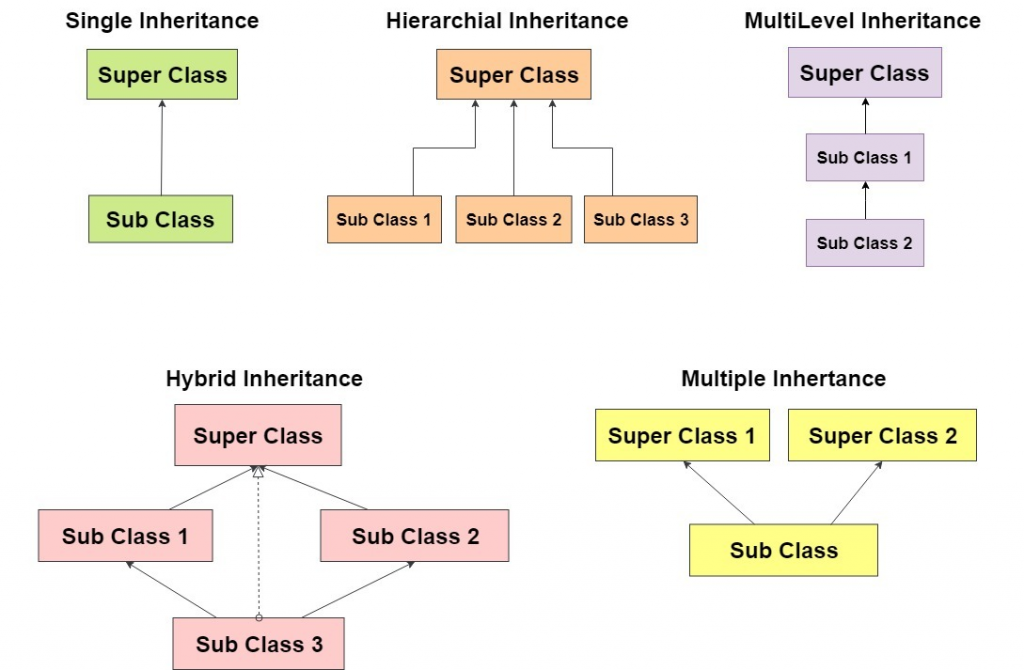

In [ ]:
# Child class inherits all methods and class variables of Parent class.
# If Child class doesn't have constructor, it'll use the parent's constructor.
class Parent:
  classvar = 1
  def __init__(self):
    self.name = "IDK"
class Child(Parent):
  pass

c1 = Child()
print(c1.name)
print(Child.classvar)
Parent.classvar = 2
print(c1.classvar)
Child.classvar += 1  # Now, Child has its own classvar which is separated from Parent.
print(Parent.classvar)
print(Child.classvar)

IDK
1
2
2
3


In [ ]:
# An example of Variable Overriding:
class Parent:
    def __init__(self):
        self.instance_var = "I am from Parent"

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.instance_var = "I am from Child"  # Overriding the instance variable

# Creating instances
parent_instance = Parent()
child_instance = Child()

# Output the instance variables
print(parent_instance.instance_var)
print(child_instance.instance_var)

I am from Parent
I am from Child


In [ ]:
# private members/private instance variables can be used like this.
class Phone:
  def __init__(self, price):
    self.__price = price

  def get_price(self):
    print(self.__price)

class Smartphone(Phone):
  pass

sams = Smartphone(10)
sams.get_price()
print(sams._Phone__price)

10
10


In [ ]:
# Method overriding with simple examples:
class A:
  def methodA(self):
    print(1, 2)
    self.methodB()
    A.methodB(self)

  def methodB(self):
    print("This method was used by using the class A.")

class B(A):
  def methodB(self):
    print("No matter where the method is called, as long as it's called by the object, the object's original method is always used.")
    super().methodB()

b1 = B()
b1.methodA()

print('############################################################################')

# If child's method works, parent's methods won't be used
class Parent:
  def __init__(self, name, number):
    self.name = name
    self.number = number

class Child(Parent):
  def __init__(self, name, number):
    self.name = name

c1 = Child('Apurba', 1) # Uses Child class's method/constructor
print(c1.__dict__)
#print(c1.number) # AttributeError: 'Child' object has no attribute 'number'
print('############################################################################')

# Now, showing you Hierarchical inheritance:
class Child2(Parent): # So, Parent class has 2 Child classes now
  def __init__(self, name, number, id):
    super().__init__(name, number) # Uses Parent class's method/constructor
    self.id = id

  def error(self):
    err = self.error()

c2 = Child2('Apurb00', 2, 2003)
print(c2.__dict__)
print('############################################################################')

#c2.error() #RecursionError: maximum recursion depth exceeded

1 2
No matter where the method is called, as long as it's called by the object, the object's original method is always used.
This method was used by using the class A.
This method was used by using the class A.
############################################################################
{'name': 'Apurba'}
############################################################################
{'name': 'Apurb00', 'number': 2, 'id': 2003}
############################################################################


In [ ]:
# An example of multi level inheritance: (Also Hybrid)
class Product:
  def __init__(self):
    self.Type = 'High quality products!'

class Phone(Product):
  def __init__(self, brand):
    super().__init__()
    self.brand = brand

class Smartphone(Phone):
  def __init__(self, brand, price):
    super().__init__(brand)
    self.price = price

class Tablet(Phone): # Now Phone class has 2 Child classes => Smartphone & Tablet (This is Hierarchical inheritance)
  pass

class Screen(Tablet):
  pass


galaxya10 = Smartphone('Samsung', 10000)
print(galaxya10.brand, galaxya10.price)

tablet_1 = Tablet('Apple')
print(tablet_1.brand, 'is a brand with', tablet_1.Type)

screen_1 = Screen('HP')
print(screen_1.brand, 'is a brand with', screen_1.Type)

Samsung 10000
Apple is a brand with High quality products!
HP is a brand with High quality products!


In [ ]:
# Multiple Inheritance
# Method resolution order (MRO). When child class inherits from 2 parent classes, if both parent classes have methods by the same name, leftmost parent class will given most priority.
class A1:
	def __init__(self):
		print("If A1 didn't have __init__, it'd check C and then A2 for it.")
	# def rk(self):
	# 	print(" In class A1")

class A2:
	# pass
	def rk(self):
		print("Checked from D, B, A1, C, and finally here, A2.")

class B(A1):
	pass
	# def rk(self):
	# 	print(" In class B")

class C(A2):
	pass
	# def rk(self):
	# 	print("In class C")

# classes ordering
class D(B, C): # 1st priority = B, then = C.
	pass
	# def rk(self):
	# 	print("In class D")

r = D()
r.rk()
print('######################################################')


help(r)

If A1 didn't have __init__, it'd check C and then A2 for it.
Checked from D, B, A1, C, and finally here, A2.
######################################################
Help on D in module __main__ object:

class D(B, C)
 |  Method resolution order:
 |      D
 |      B
 |      A1
 |      C
 |      A2
 |      builtins.object
 |  
 |  Methods inherited from A1:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A1:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from A2:
 |  
 |  rk(self)
 |      # pass

